In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

plt.rcParams.update({
  "text.usetex": True,
})

In [2]:
plt.rc('lines', linewidth=2)    # controls line width

plt.rc('font', size=28)         # controls default text sizes
plt.rc('axes', titlesize=28)    # fontsize of the axes title
plt.rc('axes', labelsize=28)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=28)   # fontsize of the tick labels
plt.rc('ytick', labelsize=28)   # fontsize of the tick labels
plt.rc('legend', fontsize=28)   # legend fontsize
plt.rc('figure', titlesize=32)  # fontsize of the figure title

In [3]:
# global parmas
f_params = {'mean': 165, 'std': 9}
m_params = {'mean': 180, 'std': 9}
start, end = 130, 210
x = np.linspace(start, end, 1000)

def normal_dist(x, mean, std):
    return norm.pdf(x, mean, std)


def plot(x, likelihoods, priors, evidence, posteriers, loss_values, decision_boundary, conditional_errors, figure_name, title):

    print(f'Decision Boundary: {decision_boundary:.2f}cm')

    # Figure
    fig = plt.figure(figsize=(20, 20))
    fig.suptitle(title)

    # Likelihood
    ax1 = fig.add_subplot(321) 
    ax1.set_title(r'likelihoods p(x\textbar y)')
    # ax1.fill_between(x, np.minimum(likelihoods['female'], likelihoods['male']), np.zeros(len(x)),color='tab:gray', alpha=0.1, label='bayes error')
    ax1.plot(x, likelihoods['female'], label='female', c='tab:red')
    ax1.plot(x, likelihoods['male'], label='male', c='tab:blue')
    ax1.vlines(decision_boundary, 0, np.maximum(likelihoods['female'], likelihoods['male']).max(), color='gray', linestyle='dotted')
    ax1.legend()

    # Prior
    ax2 = fig.add_subplot(322)
    ax2.set_title(r'priors P(y)')
    ax2.bar(['female'], [priors['female']], [0.3], color='tab:red', alpha=0.6)
    ax2.bar(['male'], [priors['male']], [0.3], color='tab:blue', alpha=0.6)

    # Evidence
    ax3 = fig.add_subplot(323)
    ax3.set_title(r'evidence p(x)')
    ax3.plot(x, evidence, c='tab:orange')

    # Posterior
    ax4 = fig.add_subplot(324)
    ax4.set_title(r'posterier P(y\textbar x)')
    ax4.plot(x, posteriers['female'], label='female', c='tab:red')
    ax4.plot(x, posteriers['male'], label='male', c='tab:blue')
    ax4.vlines(decision_boundary, 0, 1, color='gray', linestyle='dotted', label='desision boundry')
    # ax4.legend()

    # Loss Values
    ax5 = fig.add_subplot(325)
    ax5.set_title(r'loss values')
    ax5.bar(['$\ell(f, \hat{m})$'], [loss_values['female']], [0.3], color='tab:red', alpha=0.6)
    ax5.bar(['$\ell(m, \hat{f})$'], [loss_values['male']], [0.3], color='tab:blue', alpha=0.6)

    # Conditional Error
    ax6 = fig.add_subplot(326)
    ax6.set_title(r'conditional error L(y\textbar x)')
    ax6.plot(x, conditional_errors['female'], label='female', c='tab:red')
    ax6.plot(x, conditional_errors['male'], label='male', c='tab:blue')
    ax6.vlines(decision_boundary, 0, 1, color='gray', linestyle='dotted', label='desision boundry')
    # ax6.legend()
    plt.show()

    if figure_name:
        plt.savefig(f"report-latex/images/{figure_name}.png", dpi=600, bbox_inches='tight', pad_inches=0.1)

### 1. balanced priors and balanced loss (0-1 loss)

Decision Boundary: 172.44cm


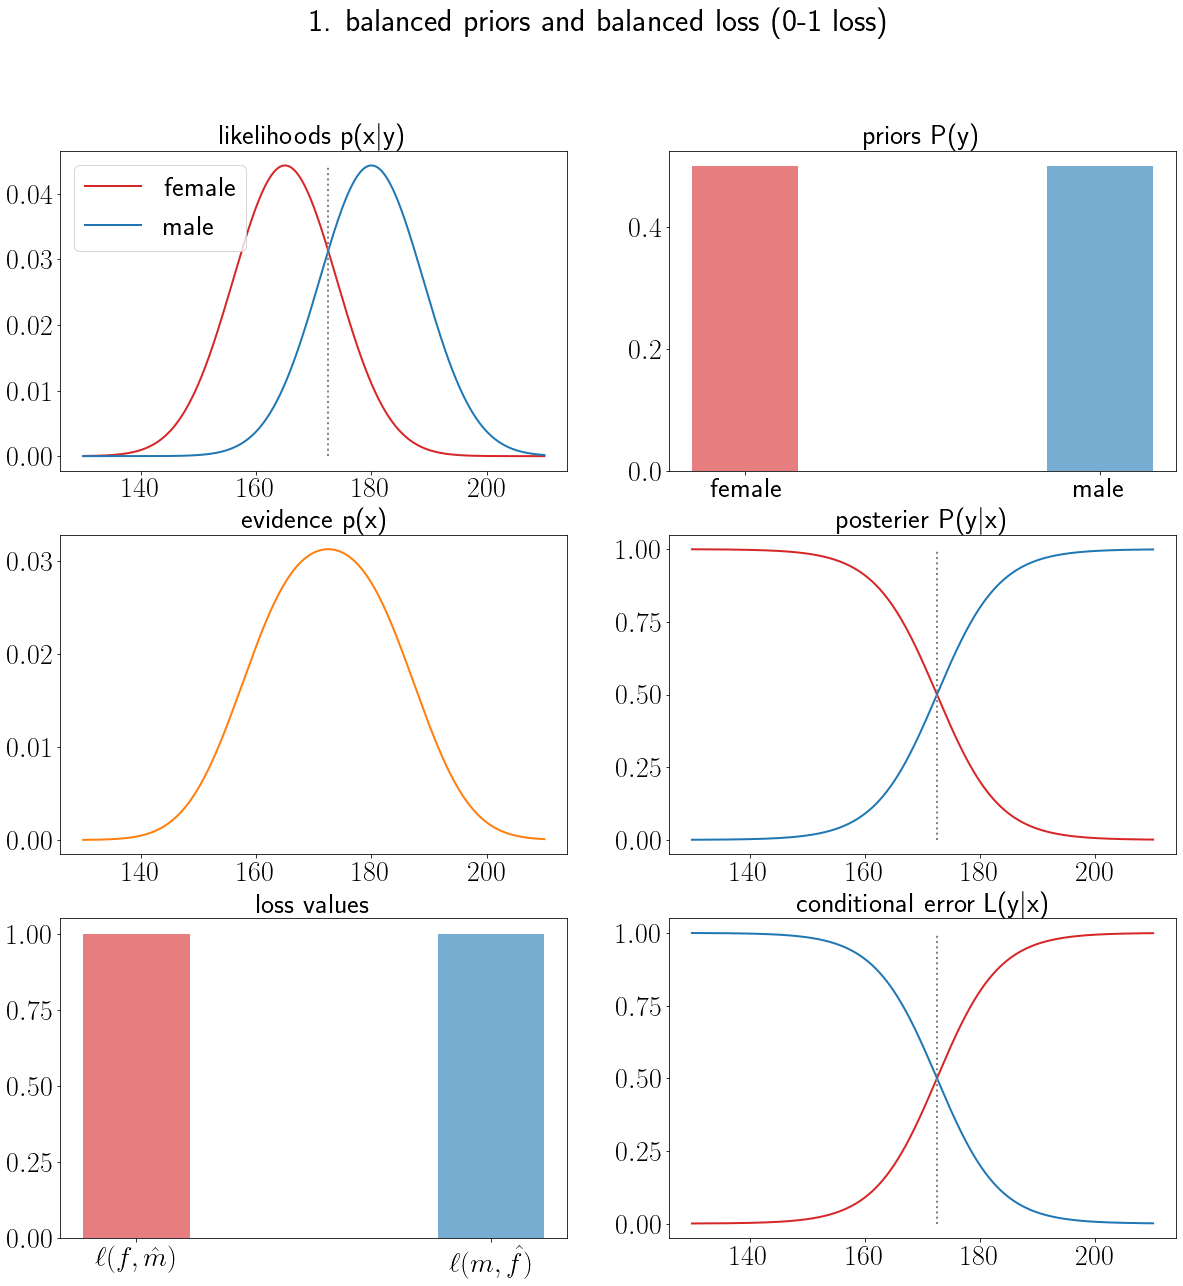

In [4]:
priors = {
    'female': 0.5,
    'male': 0.5
}

loss_values = {
    'female': 1.0,
    'male': 1.0
}

likelihoods = {
    'female': normal_dist(x, f_params['mean'], f_params['std']),
    'male': normal_dist(x, m_params['mean'], m_params['std'])
}

evidence = likelihoods['female'] * priors['female'] \
         + likelihoods['male'] * priors['male']

posteriers = {
    'female': likelihoods['female'] * priors['female'] / evidence,
    'male': likelihoods['male'] * priors['male'] / evidence
}

conditional_errors = {
    'female': (1 - posteriers['female']) * loss_values['female'],
    'male': (1 - posteriers['male']) * loss_values['male']
}

decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
    return_counts=True)[1][0] - 1]

params = {
    'x': x,
    'likelihoods': likelihoods,
    'priors': priors,
    'evidence': evidence,
    'posteriers': posteriers,
    'loss_values': loss_values,
    'decision_boundary': decision_boundary,
    'conditional_errors': conditional_errors,
    # 'figure_name': 'figure01',
    'figure_name': None,
    'title': '1. balanced priors and balanced loss (0-1 loss)'
}

plot(**params)

### 2. unbalanced priors and balanced loss

Decision Boundary: 167.88cm


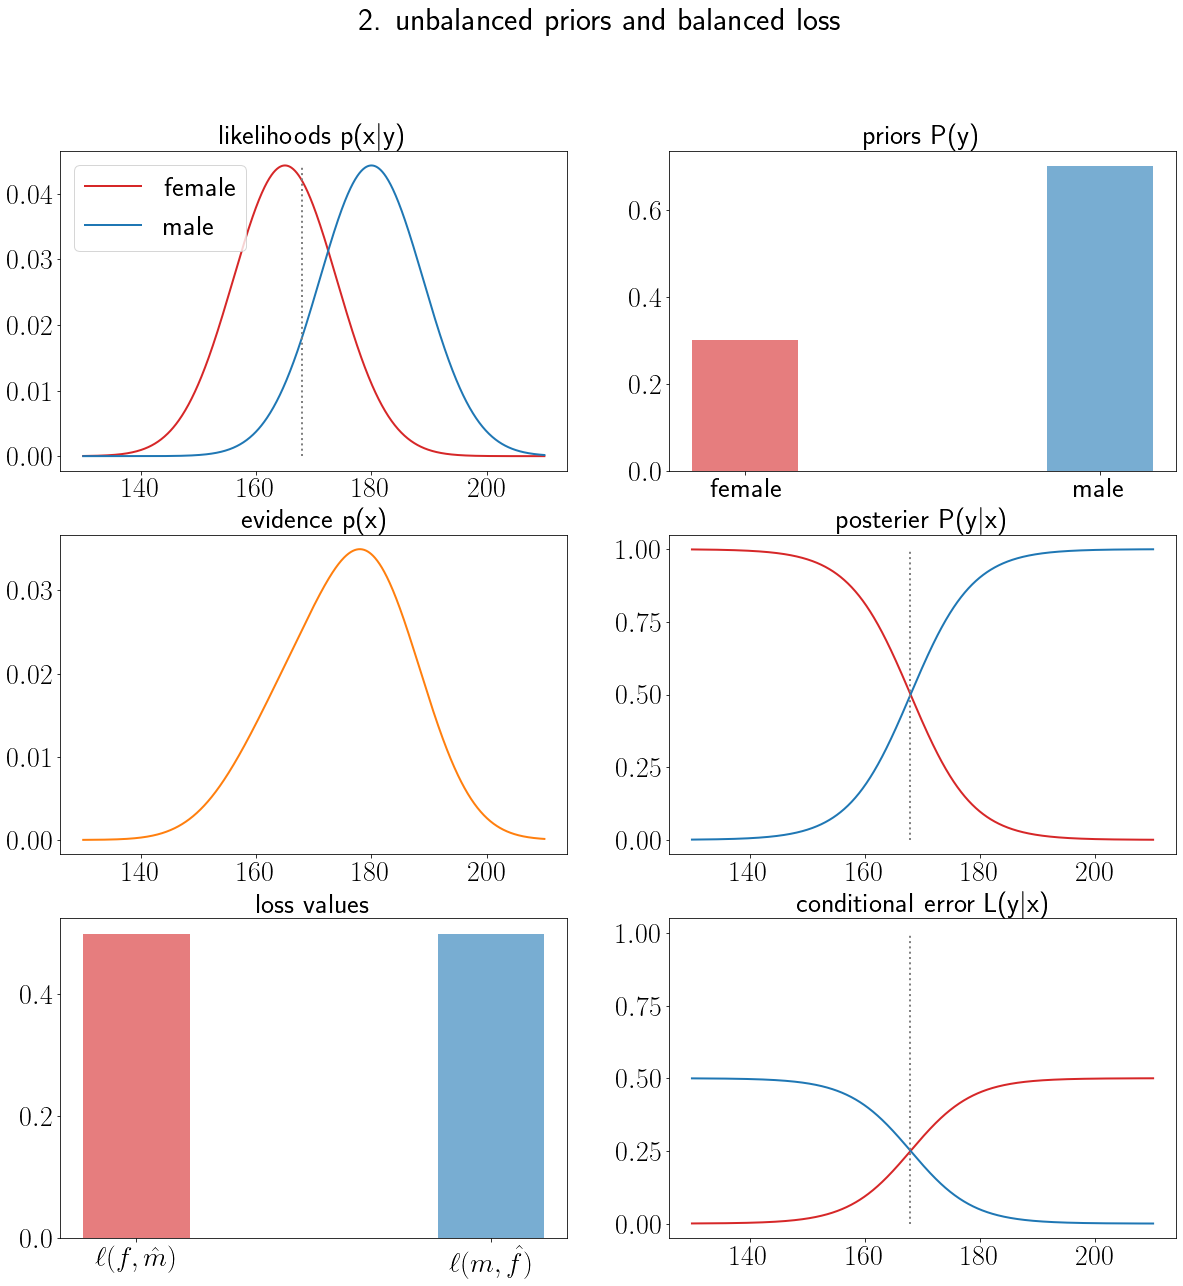

In [5]:
priors = {
    'female': 0.3,
    'male': 0.7
}

loss_values = {
    'female': 0.5,
    'male': 0.5
}

likelihoods = {
    'female': normal_dist(x, f_params['mean'], f_params['std']),
    'male': normal_dist(x, m_params['mean'], m_params['std'])
}

evidence = likelihoods['female'] * priors['female'] \
         + likelihoods['male'] * priors['male']

posteriers = {
    'female': likelihoods['female'] * priors['female'] / evidence,
    'male': likelihoods['male'] * priors['male'] / evidence
}

conditional_errors = {
    'female': (1 - posteriers['female']) * loss_values['female'],
    'male': (1 - posteriers['male']) * loss_values['male']
}

decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
    return_counts=True)[1][0] - 1]

params = {
    'x': x,
    'likelihoods': likelihoods,
    'priors': priors,
    'evidence': evidence,
    'posteriers': posteriers,
    'loss_values': loss_values,
    'decision_boundary': decision_boundary,
    'conditional_errors': conditional_errors,
    # 'figure_name': 'figure02',
    'figure_name': None,
    'title': '2. unbalanced priors and balanced loss'
}

plot(**params)

### 3. balanced priors and unbalanced loss

Decision Boundary: 167.88cm


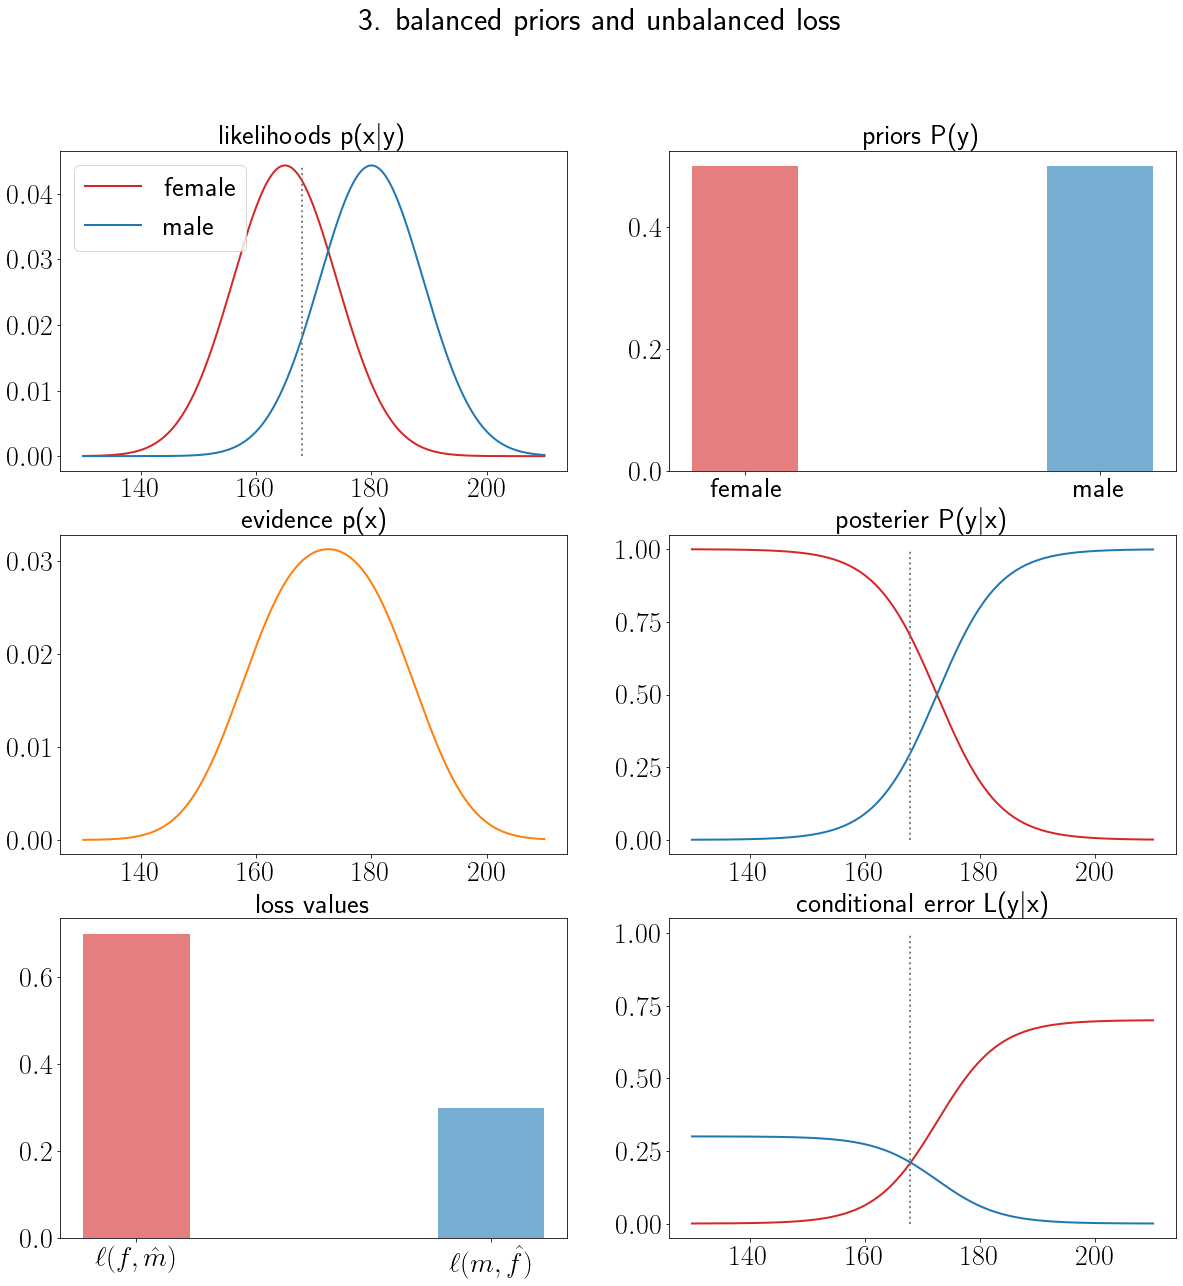

In [6]:
priors = {
    'female': 0.5,
    'male': 0.5
}

loss_values = {
    'female': 0.7,
    'male': 0.3
}

likelihoods = {
    'female': normal_dist(x, f_params['mean'], f_params['std']),
    'male': normal_dist(x, m_params['mean'], m_params['std'])
}

evidence = likelihoods['female'] * priors['female'] \
         + likelihoods['male'] * priors['male']

posteriers = {
    'female': likelihoods['female'] * priors['female'] / evidence,
    'male': likelihoods['male'] * priors['male'] / evidence
}

conditional_errors = {
    'female': (1 - posteriers['female']) * loss_values['female'],
    'male': (1 - posteriers['male']) * loss_values['male']
}

decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
    return_counts=True)[1][0] - 1]

params = {
    'x': x,
    'likelihoods': likelihoods,
    'priors': priors,
    'evidence': evidence,
    'posteriers': posteriers,
    'loss_values': loss_values,
    'decision_boundary': decision_boundary,
    'conditional_errors': conditional_errors,
    # 'figure_name': 'figure03',
    'figure_name': None,
    'title': '3. balanced priors and unbalanced loss'
}

plot(**params)

### 4. unbalanced priors and unbalanced loss

Decision Boundary: 170.04cm


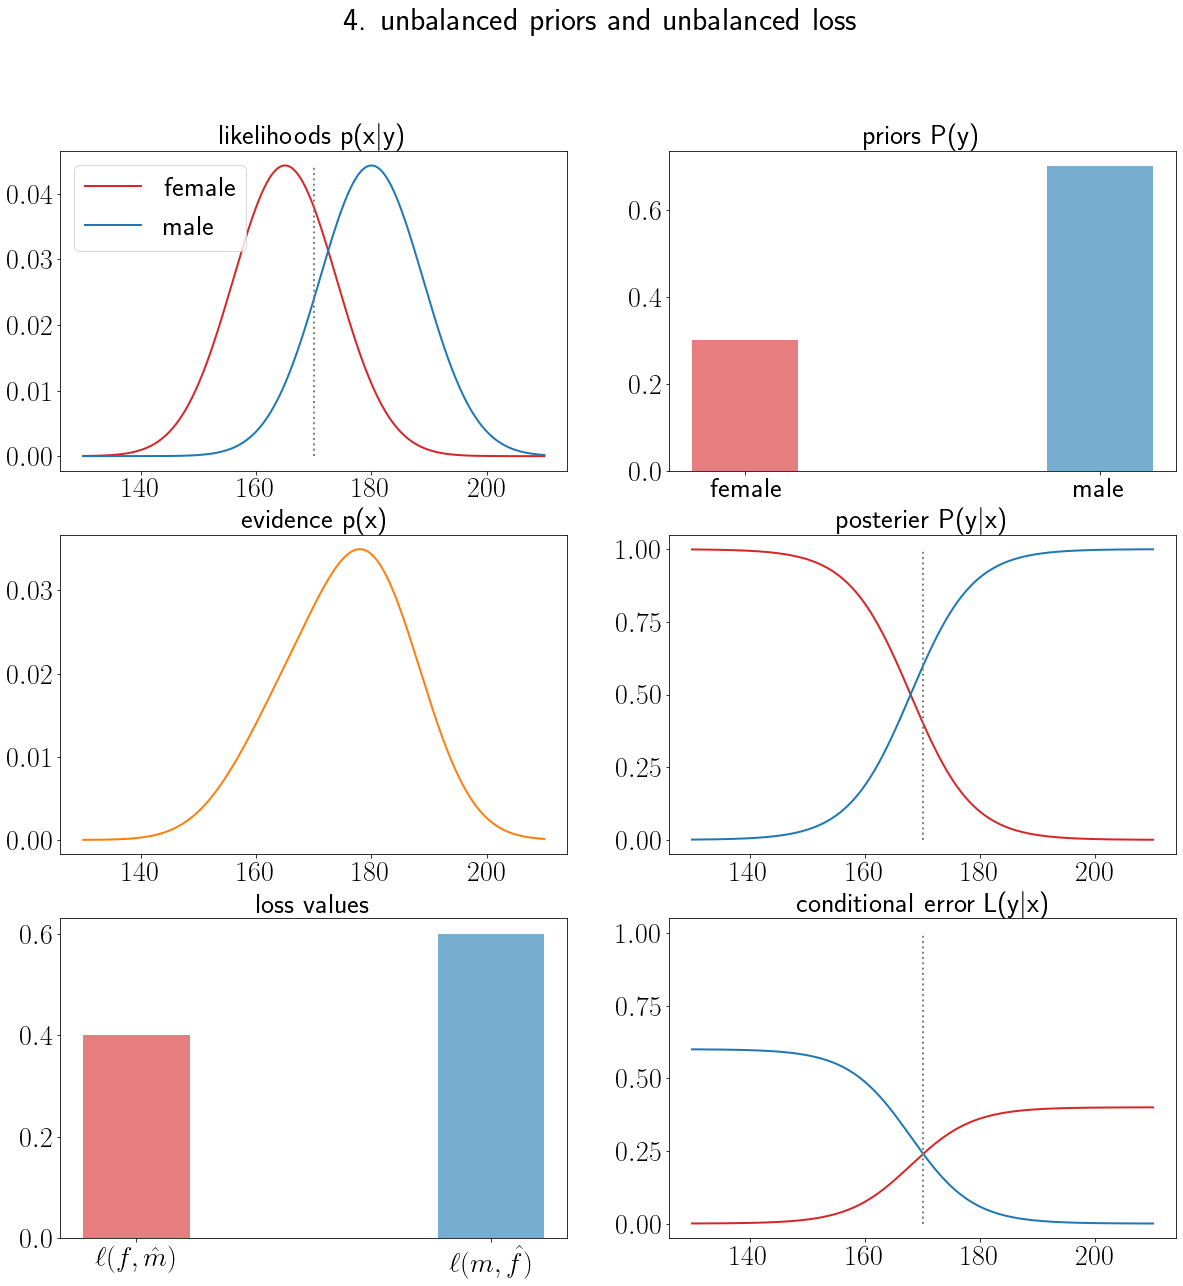

In [7]:
priors = {
    'female': 0.3,
    'male': 0.7
}

loss_values = {
    'female': 0.4,
    'male': 0.6
}

likelihoods = {
    'female': normal_dist(x, f_params['mean'], f_params['std']),
    'male': normal_dist(x, m_params['mean'], m_params['std'])
}

evidence = likelihoods['female'] * priors['female'] \
         + likelihoods['male'] * priors['male']

posteriers = {
    'female': likelihoods['female'] * priors['female'] / evidence,
    'male': likelihoods['male'] * priors['male'] / evidence
}

conditional_errors = {
    'female': (1 - posteriers['female']) * loss_values['female'],
    'male': (1 - posteriers['male']) * loss_values['male']
}

decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
    return_counts=True)[1][0] - 1]

params = {
    'x': x,
    'likelihoods': likelihoods,
    'priors': priors,
    'evidence': evidence,
    'posteriers': posteriers,
    'loss_values': loss_values,
    'decision_boundary': decision_boundary,
    'conditional_errors': conditional_errors,
    # 'figure_name': 'figure04',
    'figure_name': None,
    'title': '4. unbalanced priors and unbalanced loss'
}

plot(**params)